# Problem Statement 

#### Delivery_time :- Predict delivery time using sorting time

### Import all the required libraries 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

### Read the dataset 

In [2]:
dt = pd.read_csv("delivery_time.csv")
dt.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
#Shape of the dataset:-
dt.shape

(21, 2)

#### This dataset have 21 rows and 2 variables.

In [4]:
##Checking datatypes:-
dt.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [5]:
##Statistical description of the data:-
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
Delivery Time,21.0,16.790952,5.074901,8.0,13.5,17.83,19.75,29.0
Sorting Time,21.0,6.190476,2.542028,2.0,4.0,6.00,8.00,10.0


In [6]:
##Checking null values:-
dt.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

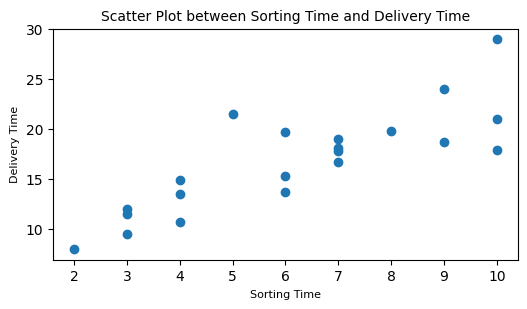

In [7]:
## Checking the relationship between both dependent and independent variables:-
plt.figure(figsize=(6,3))
plt.scatter(x = "Sorting Time", y = "Delivery Time", data = dt)
plt.xlabel("Sorting Time",size = 8)
plt.ylabel("Delivery Time",size = 8)
plt.title("Scatter Plot between Sorting Time and Delivery Time",size=10,color = "black")
plt.show()

<AxesSubplot: >

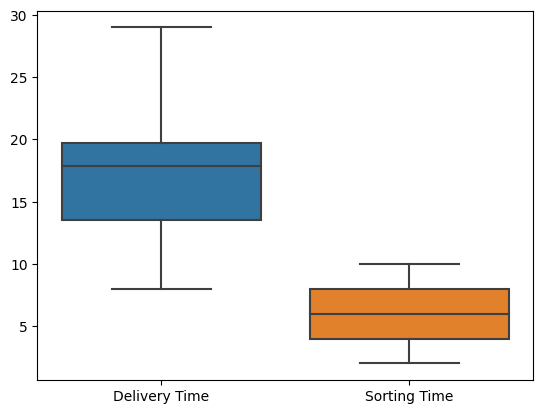

In [5]:
# Checking the outliers in the dataset using boxplot:-
sns.boxplot(data = dt)

In [8]:
##Checking correlation between both the variables:-
dt.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


### Model Building

In [9]:
y = dt.iloc[:,0]
x = dt.iloc[:,1]


In [10]:
model = smf.ols("y~x",data=dt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        17:11:19   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
x              1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
model.params

Intercept    6.582734
x            1.649020
dtype: float64

In [12]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [13]:
#Predicted values:-
model.predict()

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

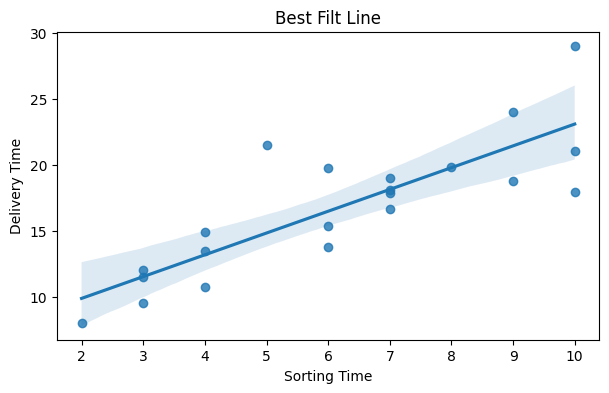

In [14]:
#Best Fit Line:-
plt.figure(figsize=(7,4))
sns.regplot(x="Sorting Time",y="Delivery Time",data=dt)
plt.title("Best Filt Line")
plt.show()

In [15]:
#Using log function for Sorting Time to increase r-squared value:-
model2 = smf.ols("y~np.log(x)",data=dt).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           2.64e-06
Time:                        17:12:19   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(x)      9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#Using log function for Delivery Time to increase r-squared value:-
model3 = smf.ols("np.log(y)~x",data=dt).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(y)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           1.59e-06
Time:                        17:12:49   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
x              0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model3.predict()

array([3.17688783, 2.54357825, 2.75468144, 3.07133624, 3.17688783,
       2.75468144, 2.86023304, 2.43802665, 3.17688783, 3.07133624,
       2.96578464, 2.54357825, 2.86023304, 2.43802665, 2.43802665,
       2.54357825, 2.75468144, 2.86023304, 2.33247505, 2.86023304,
       2.64912984])